In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
def crp(n_rounds, alpha):
    '''Simulate a finite number of rounds of CRP using the
    given concentration parameter.'''
    
    # First customer sits at first table
    seating = [0]
    for i in range(n_rounds - 1):
        next_seat = crp_round(seating, alpha)
        seating.append(next_seat)

    return np.array(seating)

def crp_round(seating, alpha):
    n_occupied = max(seating) + 1
    distrib = np.zeros(n_occupied + 1)
    for i in range(len(seating)):
        distrib[seating[i]] += 1.0
    distrib[n_occupied] = alpha
    distrib /= float(alpha + len(seating))
    next_seat = np.random.choice(np.arange(n_occupied + 1, dtype='int'), p = distrib)
    return next_seat

In [4]:
alphas = [0.5, 1.0, 2.0, 5.0]

In [5]:
%%time
n_rounds = 100
n_trials = 500
X = np.zeros((len(alphas), n_trials, n_rounds), dtype='int')

for i, alpha in enumerate(alphas):
    for j in range(n_trials):
        seating = crp(n_rounds = n_rounds, alpha = alpha)
        X[i, j, :] = seating

CPU times: user 7.89 s, sys: 21.7 ms, total: 7.92 s
Wall time: 7.92 s


In [6]:
print "Seating: {}".format(X[0, 0, :])
print "Number of occupied tables: {}".format(max(X[0, 0, :]) + 1)

Seating: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Number of occupied tables: 2


### Visualizing single trials

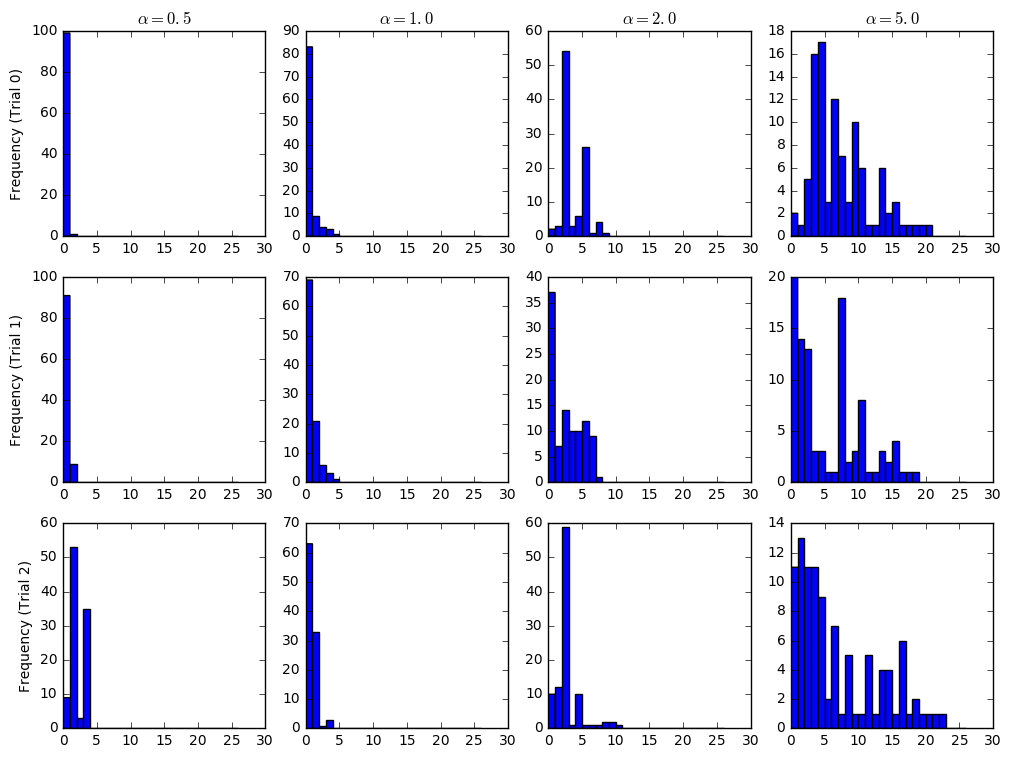

In [7]:
trials_to_plot = [0, 1, 2]
figshape = np.array([len(trials_to_plot), len(alphas)])

fig, ax = plt.subplots(*figshape, figsize = figshape[::-1] * 3)
for alpha_index in range(len(alphas)):
    ax[0, alpha_index].set_title(r"$\alpha = {}$".format(alphas[alpha_index]))
    for row_index, trial_index in enumerate(trials_to_plot):
        ax[row_index, alpha_index].hist(X[alpha_index, trial_index, :], bins=np.arange(np.max(X)+1))
        if alpha_index == 0:
            ax[row_index, alpha_index].set_ylabel("Frequency (Trial {})".format(trial_index))
None

### Number of tables occupied

In [8]:
tables_occupied = 1 + np.amax(X, X.ndim-1)

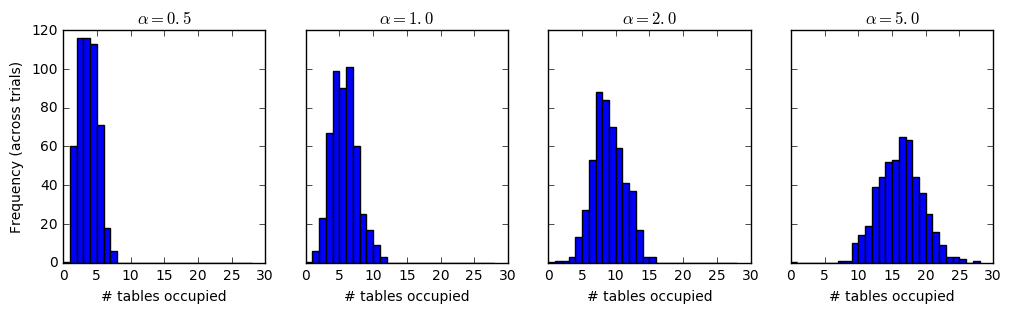

In [9]:
figshape = np.array([1, len(alphas)])
fig, ax = plt.subplots(*figshape, figsize = figshape[::-1] * 3, sharex = True, sharey = True)

for alpha_index, alpha in enumerate(alphas):
    ax[alpha_index].hist(tables_occupied[alpha_index, :], bins=np.arange(np.max(tables_occupied)+2))
    ax[alpha_index].set_title(r"$\alpha = {}$".format(alpha))
    ax[alpha_index].set_xlabel("# tables occupied")

ax[0].set_ylabel("Frequency (across trials)")
None